# MODULO IV - Naive Bayes

<br>
<font size="4">
<p>

## Naive Bayes - Definición
Los algoritmos de Clasificación de Bayes son métodos que capturan un modelo probabilístico oculto en un grupo de muestras. Para poder establecer tales probabilidades, es necesario que todas las muestras actuales (o de entrenamiento) se encuentren con todas sus características descritas y que también se encuentren etiquetadas con la clase a la cual pertenecen, siendo entonces este un algoritmo supervisado multiclase.

Siendo X una muestra y C una clase, la probabilidad de que X pertenezca a la clase C está dada por:

$$P(C|X) = \frac{(\prod_{i=1}^{n} P(x_i|C))P(C)}{P(X)}$$

### Naive Bayes - Pasos

Para poder asignarle a una muestra una clase, los siguientes pasos son realizados por cada una de las clases para obtener varios términos de la forma $P(C|X)$, conocidos como probabilidades a posteriori. Al final se obtienen tantas probabilidades a posteriori como clases:

-Cálculo de probabilidades a priori $P(C)$: Si no se tiene información de las probabilidades de las clases, este término se puede calcular como el número de muestras de la clase sobre el total de muestras en el conjunto de datos.

-Cálculo de la evidencia $P(X)$: Se calcula la probabilidad marginal de la muestra X sobre todas las clases. Este paso generalmente se omite y solo se calcula el numerador compuesto por la multiplicación de likelihoods con a priori.

-Cálculo de likelihood por característica en esa clase $P(x_i | C)$: Dependiendo del tipo de caracteristica se calcula el likelihood de forma diferente. Para caracteristicas categóricas y multinomiales se hace un conteo, y para caracteristicas continuas se usa la función de densidad normal.

-Cálculo de probabilidad a posteriori de la clase $P(C|X)$ con los valores obtenidos en los 3 pasos anteriores.

Cuando se tienen los términos $P(C|X)$ para todas las clases se elige la clase con el término que tenga mayor valor, es decir, la mayor probabilidad a posteriori. Como la evidencia $P(X)$ es un término en el denominador de todos los $P(C|X)$, el cálculo de este se puede ignorar (no afecta el cálculo del mayor), obteniendo la expresión final para Naive Bayes:

$$\text{arg} \max_{C_k} P(C_k|X) = \text{arg} \max_{C_k} (\prod_{i=1}^{n} P(x_i|C_k))P(C_k)$$




### Generar datos sintéticos

In [2]:
#Librerias para el manejo de datos y datos numéricos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from __future__ import division
%matplotlib inline

x_r = np.random.multivariate_normal(mean=(2,2), cov=[[1, 0], [0, 1]], size=20)
x_g = np.random.multivariate_normal(mean=(4,4), cov=[[1, 0], [0, 1]], size=40)

In [3]:
#x_b
#x_b[:,0]

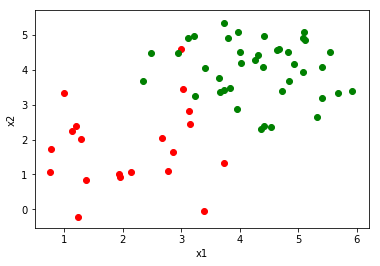

In [4]:
plt.scatter(x_r[:,0], x_r[:,1], color='r')
plt.scatter(x_g[:,0], x_g[:,1], color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
labels = [ 'red' for x in x_r ]
labels = labels + [ 'green' for x in x_g ]
table = tabulate( list(zip(x_r[:,0],x_r[:,1], ['red' for x in x_r ]))+list(zip(x_g[:,0],x_g[:,1],['green' for x in x_g ])),\
                 ['x1','x2','class'], tablefmt="fancy_grid")
print(table)

╒══════════╤════════════╤═════════╕
│       x1 │         x2 │ class   │
╞══════════╪════════════╪═════════╡
│ 2.86065  │  1.63546   │ red     │
├──────────┼────────────┼─────────┤
│ 1.24083  │ -0.2316    │ red     │
├──────────┼────────────┼─────────┤
│ 2.99744  │  4.60333   │ red     │
├──────────┼────────────┼─────────┤
│ 2.78043  │  1.08778   │ red     │
├──────────┼────────────┼─────────┤
│ 3.13399  │  2.81812   │ red     │
├──────────┼────────────┼─────────┤
│ 0.993186 │  3.34581   │ red     │
├──────────┼────────────┼─────────┤
│ 1.36768  │  0.850728  │ red     │
├──────────┼────────────┼─────────┤
│ 3.15272  │  2.44054   │ red     │
├──────────┼────────────┼─────────┤
│ 0.760971 │  1.07162   │ red     │
├──────────┼────────────┼─────────┤
│ 3.02305  │  3.44008   │ red     │
├──────────┼────────────┼─────────┤
│ 1.13928  │  2.23308   │ red     │
├──────────┼────────────┼─────────┤
│ 1.28225  │  2.01668   │ red     │
├──────────┼────────────┼─────────┤
│ 2.67218  │  2.03155   │ re

#### Paso 1
Calcular las probabilidades a priori de cada clase.

In [6]:
p_r = len(x_r) / (len(x_r)+len(x_g))
p_g = len(x_g) / (len(x_r)+len(x_g))

print('P(red)=',p_r,', P(green)=',p_g);

P(red)= 0.3333333333333333 , P(green)= 0.6666666666666666


#### Paso 2
Cálculo del likelihood

$
p(\text{red}\mid{x_{1}})=\frac{1}{\sqrt{\text{var}x_{1}*2\pi}}\,e^{ -\frac{(x_{1}\text{observado}-\text{media }x_{1})^2}{2(\text{var}x_{1})} }
$

In [7]:
#Sample mean calculation
x1_red_mean, x2_red_mean  = np.mean(x_r[:,0]), np.mean(x_r[:,1])
x1_green_mean, x2_green_mean  = np.mean(x_g[:,0]), np.mean(x_g[:,1])
#Sample variance calculation
x1_red_var, x2_red_var  = np.var(x_r[:,0]), np.var(x_r[:,1])
x1_green_var, x2_green_var  = np.var(x_g[:,0]), np.var(x_g[:,1])

In [8]:
print('x1_red_mean:',x1_red_mean,', x2_red_mean',x2_red_mean)
print('x1_green_mean:',x1_green_mean,', x2_green_mean',x2_green_mean)
print('x1_red_var:',x1_red_var,', x2_red_var',x2_red_var)
print('x1_green_var:',x1_green_var,', x2_green_var',x2_green_var)

x1_red_mean: 2.12597892519 , x2_red_mean 1.78785166391
x1_green_mean: 4.29943280965 , x2_green_mean 4.00876191927
x1_red_var: 0.899003816269 , x2_red_var 1.330453279
x1_green_var: 0.73526542373 , x2_green_var 0.659034295225


In [9]:
# Create a function that calculates p(c | x):
def p_c_given_xi(x_obs, mean_xi, variance_xi):
    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_xi)) * np.exp((-(x_obs-mean_xi)**2)/(2*variance_xi))
    # return p
    return p

#### Cálculo del numerador

$
{\displaystyle {\text{numerador}}={P({\text{red}})\,p({\text{x}_{1}}\mid{\text{red}})\,p({\text{x}_{2}}\mid{\text{red}})\,}{}}
$

In [10]:
#generar un ejemplo de la distribución roja
x_obs_1 = np.random.multivariate_normal(mean=(2,2), cov=[[1, 0], [0, 1]], size=1)
print(x_obs_1)

[[  3.09936738e+00   1.57028189e-03]]


In [11]:
# Numerator of the posterior if the unclassified observation is a male
num_red = p_r * \
p_c_given_xi(x_obs_1[0][0], x1_red_mean, x1_red_var) * \
p_c_given_xi(x_obs_1[0][1], x2_red_mean, x2_red_var)

num_green = p_g * \
p_c_given_xi(x_obs_1[0][0], x1_green_mean, x1_green_var) * \
p_c_given_xi(x_obs_1[0][1], x2_green_mean, x2_green_var)

print('P(c=red | x=x_obs_1 ) =',num_red)
print('P(c=green | x=x_obs_1 ) =',num_green)

P(c=red | x=x_obs_1 ) = 0.00863337542249
P(c=green | x=x_obs_1 ) = 2.92998608198e-07


# Ejemplo 

<br>
<font size="4">
<p>
 En este tutorial se entrenará un modelo Naive Bayes Gaussiano para predecir si los ingresos de una persona son mayores o iguales a 50000 dólares. A pesar de que existen caracteristicas discretas, para estas también se puede asumir una distribución Gaussiana:
<p>

## Carga y preprocesamiento de datos

 Los datos de entrenamiento se pueden descargar de la página de la [Universidad de California, Irvine](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) (UCI). (Click derecho descargar en el navegador).

 
 El conjunto de datos tiene 15 variables (Lichman, 2013).
  - age (edad): Variable Continua  [17 – 90]. 
  - workclass (clase trabajadora): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
  - fnlwgt (peso de la muestra): Variable continua [77516- 257302]. 
  - Education (nivel de educación): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
  - education-num (numero de años educado):  Variable continua [1 – 16]. 
  - marital-status (estado civil): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
  - occupation (ocupación): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
  - relationship (estado familiar): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
  - race(raza): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
  - sex (sexo): Female, Male. 
  - capital-gain (ganancia de capital): Variable Continua [0 – 99999]. 
  - capital-loss (perdida de capital): Variable Continua [0 – 4356]. 
  - hours-per-week (horas de trabajo por semana): Variable Continua [1 – 99]. 
  - native-country (país nativo): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  - income (salario): menor o igual a 50000, mas de 50000.

Lo primero que se hace es importar las librerías necesarias.

In [12]:
#Librerias para el preprocesamiento de datos (formateo para el clasificador)
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

#Librerias para la Division del dataset en Training y Test
from sklearn.cross_validation import train_test_split

# Importando un clasificador Gaussiano de la libreria Scikit learn
from sklearn.naive_bayes import GaussianNB

# Libreria para determinar que tan bueno es el modelo con valores no observados
from sklearn.metrics import accuracy_score

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<br>
<font size="4">
<p>
Para importar el dataset completo es necesario tener el archivo adult.data en la carpeta datasets. Se lee el archivo usando la función de pandas para pasar de archivos en formato csv a dataFrames.

In [37]:
df = pd.read_csv('datasets/adult.data',
                       header = None, delimiter=' *, *', engine='python')

<br>
<font size="4">
<p>
Para establecer si los datos fueron cargados correctamente, podemos observar que los 10 primeros datos correspondan con aquellos que están guardados en el archivo usando la función de dataFrames head con parámetro 10:

In [38]:
df.head(10)

0                 1       2          3   4                      5   \
0  39         State-gov   77516  Bachelors  13          Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13     Married-civ-spouse   
2  38           Private  215646    HS-grad   9               Divorced   
3  53           Private  234721       11th   7     Married-civ-spouse   
4  28           Private  338409  Bachelors  13     Married-civ-spouse   
5  37           Private  284582    Masters  14     Married-civ-spouse   
6  49           Private  160187        9th   5  Married-spouse-absent   
7  52  Self-emp-not-inc  209642    HS-grad   9     Married-civ-spouse   
8  31           Private   45781    Masters  14          Never-married   
9  42           Private  159449  Bachelors  13     Married-civ-spouse   

                  6              7      8       9      10  11  12  \
0       Adm-clerical  Not-in-family  White    Male   2174   0  40   
1    Exec-managerial        Husband  White    Male      0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male      0   0  40   
3  Handlers-cleaners        Husband  Black    Male      0   0  40   
4     Prof-specialty           Wife  Black  Female      0   0  40   
5    Exec-managerial           Wife  White  Female      0   0  40   
6      Other-service  Not-in-family  Black  Female      0   0  16   
7    Exec-managerial        Husband  White    Male      0   0  45   
8     Prof-specialty  Not-in-family  White  Female  14084   0  50   
9    Exec-managerial        Husband  White    Male   5178   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K  
5  United-States  <=50K  
6        Jamaica  <=50K  
7  United-States   >50K  
8  United-States   >50K  
9  United-States   >50K

<br>
<font size="4">
<p>
Como se observa, las variables no tienen sus nombres correspondientes, así que es necesario asignarlos para poder establecer matemáticamente likelihoods de la forma $P(propiedad|income)$. Los nombres asignados son los mismos que en la página del dataset de [UCI](https://archive.ics.uci.edu/ml/datasets/Adult).

In [39]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
df.head(10)

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital_status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

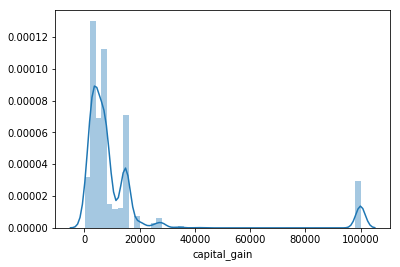

In [43]:
sns.distplot(df[df['capital_gain']>0].capital_gain)

<br>
<font size="4">
<p>
Teniendo en cuenta que Naive Bayes es supervisado, es necesario verificar que no haya valores sin asignar (nulos) dentro del dataFrame.

In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<br>
<font size="4">
<p>
Los caracteres "?" también indican la existencia de datos perdidos en el dataFrame. Esta comprobación se hace con las variables que no son continuas.

In [17]:
for value in  ['workclass', 'education','marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'native_country', 'income']:
    print(value,":", sum(df[value] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


<br>
<font size="4">
<p>
Aún no se puede aplicar un clasificador de Naive Bayes Gaussiano debido a la existencia de estos valores. Así que es necesario hacer un preprocesamiento de los datos. Para comparar la diferencia entre el dataFrame antes y después del preprocesamiento se hace una copia de este (se observan además propiedades adicionales usando el método describe):

In [18]:
df_pre = df
df_pre.describe(include= 'all')

age workclass        fnlwgt education  education_num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital_status      occupation relationship   race    sex  \
count                32561           32561        32561  32561  32561   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 14976            4140        13193  27816  21790   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital_gain  capital_loss  hours_per_week native_country income  
count   32561.000000  32561.000000    32561.000000          32561  32561  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          29170  24720  
mean     1077.648844     87.303830       40.437456            NaN    NaN  
std      7385.292085    402.960219       12.347429            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

<br>
<font size="4">
<p>
La fila top describe en las variables categóricas cual es el elemento que más se repite, así que un preprocesamiento básico que se va a realizar es reemplazar valores con categoría "?" por el valor que se encuentra en la fila top de la variable correspondiente. Por ejemplo, para workclass los valores con "?" serán reemplazados con "Private". En este ejemplo se vuelve a revisar si quedaron valores faltantes.

In [19]:
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    df_pre[value].replace(['?'], [df_pre.describe(include='all')[value][2]],
                                inplace=True)
    print(value,":", sum(df[value] == '?'))

workclass : 0
education : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
native_country : 0
income : 0


<br>
<font size="4">
<p>
## Conversión de datos categóricos a valores numéricos y estandarización


Para poder utilizar el clasificador de Naive Bayes Gaussiano implementado en Scikit-learn es recomendable que los valores de las categorías sean numéricos. El primer paso es codificar los datos en formato binario:

In [20]:
le = preprocessing.LabelEncoder()
workclass_cat = le.fit_transform(df_pre.workclass)
education_cat = le.fit_transform(df_pre.education)
marital_cat   = le.fit_transform(df_pre.marital_status)
occupation_cat = le.fit_transform(df_pre.occupation)
relationship_cat = le.fit_transform(df_pre.relationship)
race_cat = le.fit_transform(df_pre.race)
sex_cat = le.fit_transform(df_pre.sex)
native_country_cat = le.fit_transform(df_pre.native_country)

<br>
<font size="4">
<p>
Luego se añaden estas nuevas columnas categorizadas numéricamente al dataframe, eliminando las versiones previas.

In [21]:
df_pre['workclass_cat'] = workclass_cat
df_pre['education_cat'] = education_cat
df_pre['marital_cat'] = marital_cat
df_pre['occupation_cat'] = occupation_cat
df_pre['relationship_cat'] = relationship_cat
df_pre['race_cat'] = race_cat
df_pre['sex_cat'] = sex_cat
df_pre['native_country_cat'] = native_country_cat

In [22]:
a_borrar = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
df_pre = df_pre.drop(a_borrar, axis = 1)

df_pre.head(10)

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   
6   49  160187              5             0             0              16   
7   52  209642              9             0             0              45   
8   31   45781             14         14084             0              50   
9   42  159449             13          5178             0              40   

  income  workclass_cat  education_cat  marital_cat  occupation_cat  \
0  <=50K              6              9            4               0   
1  <=50K              5              9            2               3   
2  <=50K              3             11            0               5   
3  <=50K              3              1            2               5   
4  <=50K              3              9            2               9   
5  <=50K              3             12            2               3   
6  <=50K              3              6            3               7   
7   >50K              5             11            2               3   
8   >50K              3             12            4               9   
9   >50K              3              9            2               3   

   relationship_cat  race_cat  sex_cat  native_country_cat  
0                 1         4        1                  38  
1                 0         4        1                  38  
2                 1         4        1                  38  
3                 0         2        1                  38  
4                 5         2        0                   4  
5                 5         4        0                  38  
6                 1         2        0                  22  
7                 0         4        1                  38  
8                 1         4        0                  38  
9                 0         4        1                  38

<br>
<font size="4">
<p>
Ahora todas las características se encuentran representadas por valores numéricos para todas las muestras. Por ejemplo, en la variable "sex_cat" que corresponde con el sexo ahora solo se tienen dos valores 1 para "Male" y 0 para "Female". Sin embargo, todas las características se encuentran en escalas diferentes. 

Para estandarizar todas las características (o variables) se toma el valor de una característica de una muestra, se le resta la media del valor de esa característica en todas las muestras y se divide sobre la varianza de esa caracteristica en todas las muestras.
$${x}_i = \frac{{x}_i - \mu(x)} {\sigma(x)}$$

Escalar las variables de esta forma asegura que los valores queden distribuidos con las propiedades de una distribución Gaussiana de media cero y varianza 1 (Rascha, 2014). Esta es una distribución adecuada para poder aplicar Naive Bayes Gaussiano (recordando que se asume que los datos se distribuyen de forma Gaussiana).

In [23]:
caracteristicas = ['age', 'workclass_cat', 'fnlwgt', 'education_cat', 'education_num',
                'marital_cat', 'occupation_cat', 'relationship_cat', 'race_cat',
                'sex_cat', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country_cat']

for caracteristica in caracteristicas:
    mean = df_pre[caracteristica].mean()
    std = df_pre[caracteristica].std()
    df_pre.loc[:, caracteristica] = (df_pre[caracteristica] - mean)/std
    
df_pre.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3.256100e+04  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04   
mean  -2.549411e-17 -9.488092e-17   2.539659e-16  1.265595e-15  3.655696e-16   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.582182e+00 -1.681605e+00  -3.529602e+00 -1.459182e-01 -2.166562e-01   
25%   -7.757560e-01 -6.816805e-01  -4.200532e-01 -1.459182e-01 -2.166562e-01   
50%   -1.159528e-01 -1.082176e-01  -3.135955e-02 -1.459182e-01 -2.166562e-01   
75%    6.904732e-01  4.478697e-01   7.460277e-01 -1.459182e-01 -2.166562e-01   
max    3.769554e+00  1.226837e+01   2.300802e+00  1.339437e+01  1.059334e+01   

       hours_per_week  workclass_cat  education_cat   marital_cat  \
count    3.256100e+04   3.256100e+04   3.256100e+04  3.256100e+04   
mean    -1.361809e-15  -1.000452e-15   4.634493e-16 -2.488566e-16   
std      1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
min     -3.193981e+00  -2.794847e+00  -2.660855e+00 -1.734032e+00   
25%     -3.542890e-02  -8.529502e-02  -3.354318e-01 -4.062060e-01   
50%     -3.542890e-02  -8.529502e-02   1.813288e-01 -4.062060e-01   
75%      3.695137e-01  -8.529502e-02   4.397092e-01  9.216198e-01   
max      4.742894e+00   3.527441e+00   1.214850e+00  2.249446e+00   

       occupation_cat  relationship_cat      race_cat       sex_cat  \
count    3.256100e+04      3.256100e+04  3.256100e+04  3.256100e+04   
mean    -5.867158e-16     -2.198556e-17 -6.826605e-16  7.255098e-16   
std      1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   
min     -1.545232e+00     -9.001670e-01 -4.318843e+00 -1.422309e+00   
25%     -7.900795e-01     -9.001670e-01  3.936615e-01 -1.422309e+00   
50%     -3.492705e-02     -2.778008e-01  3.936615e-01  7.030605e-01   
75%      7.202254e-01      9.669317e-01  3.936615e-01  7.030605e-01   
max      1.727095e+00      2.211664e+00  3.936615e-01  7.030605e-01   

       native_country_cat  
count        3.256100e+04  
mean         1.232719e-15  
std          1.000000e+00  
min         -6.013355e+00  
25%          2.613660e-01  
50%          2.613660e-01  
75%          2.613660e-01  
max          5.916144e-01

<br>
<font size="4">
<p>
## Partición de datos de entrenamiento y de test

Se va a hacer una partición de los datos de forma aleatoria, de modo que un tercio de las muestras se usara para test y el resto para entrenar el algoritmo Naive Bayes Gaussiano. Para ello se usa train_test_split().

Las características consisten en las columnas diferentes de "income". Las clases están dadas por la columna "income".

In [24]:

caract = df_pre[df_pre.columns.difference(['income'])].values
clases = df_pre.loc[:, 'income'].values
caract_train, caract_test, clases_train, clases_test = train_test_split(caract,
                                                                           clases, test_size = 0.33, random_state = 10)

<br>
<font size="4">
<p>
caract_train y caract_test contienen la información de las características y las clases de la partición de entrenamiento respectivamente. caract_test y clases_test cumplen la misma propiedad respecto al conjunto de test.

<br>
<font size="4">
<p>
## Entrenando el modelo Naive Bayes Gaussiano

Para entrenarlo, simplemente hay que usar el modulo GaussianNB de la librería Scikit learn. Este módulo calcula automáticamente los likelihood en base a la media y varianza muestrales como se observó en la presentación:

<img src="imgs/mediayvarianza.PNG" width="600" height="400">


- Media: Se suman todos los valores que tiene la característica i en todas las muestras pertenecientes a la clase seleccionada $C_k$ y se divide entre el número de muestras que tiene tal clase.
- Varianza: Se calcula el cuadrado de la diferencia entre el valor de la característica i y la media obtenida previamente. Esto se hace por cada muestra en la clase, para luego sumar todos los cuadrados resultantes y dividir la sumatoria entre el número de muestras pertenecientes a esa clase menos 1. 

Para establecer el likelihood $P(x_i|C_k)$ entre un valor de la característica i y la clase $C_k$, se procede a usar la función de densidad de la distribución Gaussiana que depende de tres valores: El valor que tiene la característica de la muestra a clasificar, la media del valor de esa característica en la clase $C_k$ y la varianza de esa caracteristica en la clase $C_k$. Este mismo método también puede funcionar con variables discretas si se puede asumir que se distribuyen de forma normal.

<img src="imgs/densidad.PNG" width="300" height="400">



In [25]:
clasificador = GaussianNB()
clasificador.fit(caract_train, clases_train)

GaussianNB(priors=None)

<br>
<font size="4">
<p>
Para establecer si el algoritmo está funcionando bien, se prueba prediciendo las clases de las caracteristicas en el conjunto de test. Una medida de qué tan bien se están prediciendo las clases es la precisión (número de muestras de test clasificadas en la clase correcta sobre el total). Para ello se usa accurracy_score de scikit-learn. 

In [26]:
prediccion = clasificador.predict(caract_test)
accuracy_score(clases_test, prediccion, normalize = True)

0.80141447980643965

<br>
<font size="4">
<p>
El resultado obtenido indica que con el entrenamiento realizado, el clasificador Naive Bayes Gaussiano predijo correctamente si el 80% de los salarios eran o no mayores a 50000 dólares.

<br>
<font size="4">
<p>
### Nota: 
Un proceso similar, pero compuesto de características multinomiales para la detección de SPAM puede ser encontrado en el siguiente [link](https://appliedmachinelearning.wordpress.com/2017/01/23/email-spam-filter-python-scikit-learn/). (Bot, 2017)

# Modulo IV - TALLER
<BR>

## Clasificador Naive Bayes Gaussiano
<br>
<font size="4">
<p>
El anterior clasificador permite clasificar muestras individualmente, como es el caso de la primera muestra en el conjunto de pruebas:

In [33]:
print("Valores de características: ",caract_test[0])
print("Clase: ",clases_test[0])
print("Clase predicha: ", clasificador.predict([caract_test[0]]) )

Valores de características:  [ 1.42358779 -0.14591824 -0.2166562   0.18132884 -0.42005317 -0.62955358
 -1.97915343  0.92161979  0.26136598 -1.54523205  0.39366148 -0.27780077
 -1.42230892  2.62425734]
Clase:  <=50K
Clase predicha:  ['<=50K']


<br>
<font size="4">
<p>

Implemente una funcion que dado un arreglo de caracteristicas en el mismo orden del dataframe preprocesado (df_pre) prediga la clase de una muestra individual calculando la media, la varianza y la probabilidad calculada con funciones de densidad. 

Parámetros:
- Arreglo de valores de características de la muestra a evaluar en el mismo orden del dataframe después del preprocesamiento.
- Dataframe después del preprocesamiento

Retorno:
- El retorno debe ser la Clase predicha en el formato '<=50K' o '>50k'.

Se brinda una función (normpdf) para el cálculo de la función de densidad de un valor de una característica (x) dada su media (mu) y desviación estándar (sigma) en una clase. 

Sugerencias: 
 - Seguir el orden: Cálculo de probabilidades a priori, calculo de medias y varianzas y luego calculo de probabilidades a posteriori.
 - Dividir el dataframe en dos dataframes diferentes, uno para valores donde income es '<=50K' y otro donde income es '>50K' puede facilitar el cálculo de la media y la desviación estándar: [División de dataframes por condiciones](https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas), [Cálculo de media en dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), [Cálculo de desviación estándar en dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html).
 - Se pueden utilizar otras funciones de los pandas y de otras librerías como numpy.

<br>
<font size="4">
<p>
### Evaluación:
Para la siguiente muestra las clases resultantes de GaussianNB y de la función implementada deben ser las mismas.

In [ ]:
prueba_individual =[ 1.42358779, -0.14591824, -0.2166562, 0.18132884, -0.42005317, -0.62955358,
 -1.97915343,  0.92161979,  0.26136598, -1.54523205,  0.39366148, -0.27780077,
 -1.42230892,  2.62425734]

print("Clase predicha por GaussianNB:",clasificador.predict([prueba_individual]))
print("Clase predicha por la funcion",predecir_clase(prueba_individual, df_pre))

# Modulo IV - QUIZ
<BR>

<font size="4">
<p> <b>Pregunta 1</b><br>
Dado el conjunto de datos utilizado en este notebook, ¿Cuáles serían los tipos de características que mejor se adecúan al problema?
</p>
<br>
</font>

<font size="4">
<p> <b>Pregunta 2</b><br>
¿Qué sucede cuando no se tiene en cuenta una constante de suavizado para características multinomiales en el proceso de cálculo de likelihood $P(x_i|C_k)$?
</p>
<br>
</font>

<br>
<font size="4">
<p>
## Referencias

- Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Retrieved July 25, 2017 from: https://archive.ics.uci.edu/ml/datasets/Adult
- Raschka, S. (2014, July 11). About Feature Scaling and Normalization – and the effect of standardization for machine learning algorithms. Retrieved July 25, 2017, from http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
- Naive Bayes. (2015, May 11). Retrieved July 27, 2017, from http://scikit-learn.org/stable/modules/naive_bayes.html
- Accuracy Score. (2015, May 11). Retrieved July 27, 2017, . (2015, May 11). Retrieved July 27, 2017, fromfromhttp://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- Bot, M. (2017, March 22). Email Spam Filtering : A python implementation with scikit-learn. Retrieved July 28, 2017, from https://appliedmachinelearning.wordpress.com/2017/01/23/email-spam-filter-python-scikit-learn/
- https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/